Randomly show 3 test images of each label, in order of:
000111
222333
444555
666777
888999


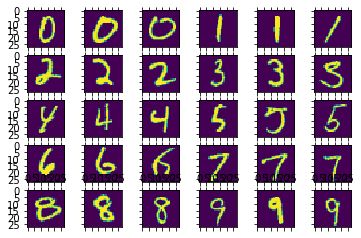

Score of linear kernel SVC:
0.9293
Score of rbf kernel SVC:
0.966
Score of custom kernel SVC:
0.13666666666666666


In [1]:
import numpy as np # 导入numpy库用于数组运算
import matplotlib.pyplot as plt # 导入pyplot库按网格展示图片
import struct # 导入struct库用于文件读取
import random # 导入随机数库用于随机选择图片进行展示
from sklearn import svm #导入sklearn库中的支持向量机
from sklearn.svm import SVC # 导入SVC模块，使用支持向量机中的支持分类机
from sklearn.preprocessing import StandardScaler # 预处理数据集进行标准化

# load_images根据数据集文件，加载图片信息，并返回存有属性值的数组
def load_images(file_name):
    # 在读取或写入一个文件之前，必须使用 Python内置open()函数来打开它。
    # file object = open(file_name [, access_mode][, buffering])       
    # file_name是包含要访问的文件名的字符串值。                         
    # access_mode指定该文件已被打开，即读，写，追加等方式。               
    # 0表示不使用缓冲，1表示在访问一个文件时进行缓冲。                    
    # 这里rb表示只能以二进制读取的方式打开一个文件                        
    binfile = open(file_name, 'rb') 
    # 从一个打开的文件读取数据
    buffers = binfile.read()
    # 读取image文件前4个整型数字
    # unpack_from按照给定的格式(fmt)解析以offset开始的缓冲区,并返回解析结果
    magic,num,rows,cols = struct.unpack_from('>IIII',buffers, 0)
    # 整个images数据大小为60000*28*28
    bits = num * rows * cols
    # 读取images数据，并存入images中
    images = struct.unpack_from('>' + str(bits) + 'B', buffers, struct.calcsize('>IIII'))
    # 关闭文件
    binfile.close()
    # 转换为[60000,784]型数组
    images = np.reshape(images, [num, rows * cols])
    return images

# load_labels根据数据集文件，加载标签信息，并返回存有标签的一维数组
def load_labels(file_name):
    # 打开文件
    binfile = open(file_name, 'rb')
    # 从一个打开的文件读取数据    
    buffers = binfile.read()
    # 读取label文件前2个整形数字，label的长度为num
    magic,num = struct.unpack_from('>II', buffers, 0) 
    # 读取labels数据
    labels = struct.unpack_from('>' + str(num) + "B", buffers, struct.calcsize('>II'))
    # 关闭文件
    binfile.close()
    # 转换为一维数组
    labels = np.reshape(labels, [num])
    return labels   
# 训练集属性值文件绝对路径
filename_train_images = 'D:\\Projects\\mnistDataSet\\train-images.idx3-ubyte'
# 训练集标签文件绝对路径
filename_train_labels = 'D:\\Projects\\mnistDataSet\\train-labels.idx1-ubyte'
# 测试集属性值文件绝对路径
filename_test_images = 'D:\\Projects\\mnistDataSet\\t10k-images.idx3-ubyte'
# 测试集标签文件绝对路径
filename_test_labels = 'D:\\Projects\\mnistDataSet\\t10k-labels.idx1-ubyte'
# 获取训练集的属性值存入数组
train_images=load_images(filename_train_images)
# 获取训练集的标签存入数组
train_labels=load_labels(filename_train_labels)
# 获取测试集的属性值存入数组
test_images=load_images(filename_test_images)
# 获取测试集的标签存入数组
test_labels=load_labels(filename_test_labels)

# 打印解释信息，下面是每个类别随机选3张test图像的显示，按照0 0 0，1 1 1-9 9 9的方式。
print('Randomly show 3 test images of each label, in order of:')
print('000111\n222333\n444555\n666777\n888999')
# 使用matplotlib包进行画图，在matplotlib中，整个图像为一个Figure对象。
# 在Figure对象中可以包含一个或者多个Axes对象。每个Axes(ax)对象都是一个拥有自己坐标系统的绘图区域
# 下面这一步通过subplots函数建立一个5*6的图像，并且把参数返回给fig和ax
fig,ax=plt.subplots(nrows=5,ncols=6,sharex='all',sharey='all')
# flatten函数将ax由n*m的Axes组展平成1*nm的Axes组
ax = ax.flatten()
# k是测试集的索引，初始化为0
k=0
# 依次读30个图片
for i in range(30):
    # 为了保证图片不重复，令k+1
    k+=1
    # while循环获得随机的三张测试集images，对应的测试集label是0-29依次除以3取整，即0-9
    while test_labels[k]!=int(i/3):
        # 取测试集样本的索引间隔为20以内的随机数。
        k+=random.randint(1,20)
    # 用reshape函数对测试集图片进行变换，从而可以输出28*28的矩阵图像
    img=test_images[k].reshape(28,28)
    # matshow是一个把矩阵或者数组绘制成图像的函数，这一步把img变成图像存入ax数组
    ax[i].matshow(img)
# 显示plt图像，按网格展示30张图片
plt.show()

# 对数据集进行标准化处理
scaler = StandardScaler()
# 通过计算训练集中样本的相关统计信息，对每个特征进行独立居中和缩放。
train_images = scaler.fit_transform(train_images)
# 然后，将平均值和标准偏差存储起来，以使用变换在以后的数据（测试集）上使用。
test_images = scaler.transform(test_images)

# 使用线性核函数构造向量机，SVC的其他参数使用默认值
linear_clf = svm.SVC(kernel='linear')
# 通过线性核向量机，使用mnist数据集的训练集进行模型训练
linear_clf.fit(train_images, train_labels)
# 通过线性核向量机训练获得的模型判断测试集的识别准确率
linear_score=linear_clf.score(test_images, test_labels)
# 打印线性核向量机模型的识别准确率结果
print('Score of linear kernel SVC:')
print(linear_score)

# 使用高斯核函数构造向量机，SVC的其他参数使用默认值
rbf_clf = svm.SVC(kernel='rbf')
# 通过高斯核向量机，使用mnist数据集的训练集进行模型训练
rbf_clf.fit(train_images, train_labels)
# 通过高斯核向量机训练获得的模型判断测试集的识别准确率
rbf_score=rbf_clf.score(test_images, test_labels)
# 打印高斯核向量机模型的识别准确率结果
print('Score of rbf kernel SVC:')
print(rbf_score)

# 注：由于考虑到内存限制和计算时长，在自定义核函数时，只取了一部分数据，分别是训练集前1000个和测试集前300个
# 获取训练集前1000个样本的属性值存入数组
X_train=train_images[:1000]
# 获取训练集前1000个样本的标签存入数组
y_train=train_labels[:1000]
# 获取测试集前300个样本的属性值存入数组
X_test=test_images[:300]
# 获取测试集前300个样本的标签存入数组
y_test=test_labels[:300]

# 使用自定义核函数构造向量机，思路采用了这条性质：核函数和另一个核函数的直积也是核函数。
# 其中一个核函数为线性核，另一个核函数为拉普拉斯核函数。
def my_kernel(X,Y):
    # 初始化一个值全为0的数组
    LaplacianK=np.zeros([len(X),len(Y)],dtype=np.float64)
    # 遍历X的每一个值，记为Xi
    for i in range(len(X)):
        # 遍历Y的每一个值，记为Yj
        for j in range(len(Y)):
            # 参数σ设为1
            gamma=1
            # 拉普拉斯核的公式为exp(-||Xi-Yi||/σ)
            LaplacianK[i][j]=np.exp(-np.linalg.norm(X[i]-Y[j])/gamma)
    # 线性核的公式为X*YT
    linearK=np.dot(X,Y.T)
    # 返回自定义核函数：拉普拉斯核和线性核的直积 构成新的核函数
    return LaplacianK * linearK
# 使用自定义核函数构造向量机，SVC的其他参数使用默认值
my_kernel_clf = svm.SVC(kernel=my_kernel)
# 通过自定义核向量机，使用mnist数据集的训练集划分出的子集进行模型训练
my_kernel_clf.fit(X_train, y_train)
# 通过自定义核函数向量机训练获得的模型判断测试集的子集的识别准确率
my_kernel_score=my_kernel_clf.score(X_test, y_test)
# 打印自定义核向量机模型的识别准确率结果
print('Score of custom kernel SVC:')
print(my_kernel_score)